<a href="https://colab.research.google.com/github/MoseAIML/Moses-/blob/main/Basics_of_Deep_Learning_and_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AfterWork Data Science: Basics of Deep Learning and Neural Networks 

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Identify the factors that could predict whether an employee will get promoted or not.

### b) Defining the Metric for Success

This project will be considered a success when:
* we are able to confidently determine which employees are likely to get promoted, and
* we get at least one model with an accuracy score of around 80%.

### c) Understanding the Context 
You work for Alphabet Inc. which is a large Multinational Corporation. The company has 9 broad verticals across the organisation. One of the problems the company is facing is around identifying the right people for promotion (only for the manager position and below) and prepare them in time

Currently the HR process, they are following is:
- They first identify a set of employees based on recommendations/ past performance.
- Selected employees go through the separate training and evaluation program for each vertical.
- These programs are based on the required skill of each vertical. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., the employee gets a promotion.

For the above-mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, the company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

### d) Recording the Experimental Design

1. Load dataset and libraries.
2. Clean dataset.
3. Carry out univariate and bivariate analysis.
4. Determine which employees are likely to be promoted based on the results of the analysis.
5. Carry out data modeling.
6. Summarize findings.
7. Provide recommendations.
8. Challenge the solution.

### e) Data Relevance

The data provided is sufficient and appropriate for answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
hr = pd.read_csv('https://bit.ly/2ODZvLCHRDataset')
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
glossary = pd.read_csv('https://bit.ly/2Wz3sWcGlossary ', header = None)
glossary

,0
0,employee_id - Unique ID for employee
1,department - Department of employee
2,region - Region of employment (unordered)
3,education - Education Level
4,gender - Gender of Employee
5,recruitment_channel - Channel of recruitment for employee
6,"nooftrainings - no of other trainings completed in previous year on soft skills, technical skills etc."
7,age - Age of Employee
8,previousyearrating - Employee Rating for the previous year
9,lengthofservice - Length of service in years


In [4]:
# dropping 'employeeid' variable
hr = hr.drop(columns = ['employee_id'])

In [5]:
# check dataset shape
hr.shape

(54808, 13)

In [6]:
# drop duplicates, if any
hr.drop_duplicates(inplace = True)
hr.shape

(54690, 13)

In [7]:
# check for missing values
hr.isna().sum()

department                 0
region                     0
education               2398
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4062
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
# dropping records with null values
hr.dropna(inplace = True, axis = 0)
hr.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
# checking the data types
hr.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [10]:
# getting the unique values of each variable
cols = hr.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique values:", hr[col].nunique())
    print(hr[col].unique())
    print()

Variable: department
Number of unique values: 9
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

Variable: region
Number of unique values: 34
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_32' 'region_6' 'region_33' 'region_8'
 'region_24' 'region_3' 'region_9' 'region_18']

Variable: education
Number of unique values: 3
["Master's & above" "Bachelor's" 'Below Secondary']

Variable: gender
Number of unique values: 2
['f' 'm']

Variable: recruitment_channel
Number of unique values: 3
['sourcing' 'other' 'referred']

Variable: no_of_trainings
Number of unique values: 10
[ 1  2  3  4  7  5  6 10  8  9]

Variable: age
Number of unique values: 41
[35 30 34 39 45 31 33

We should strip the values of the "region" variable so we are left with only the region numbers.

In [11]:
# striping "region_" from the 'region' variable
hr['region'] = hr['region'].str.strip('region_')
hr.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


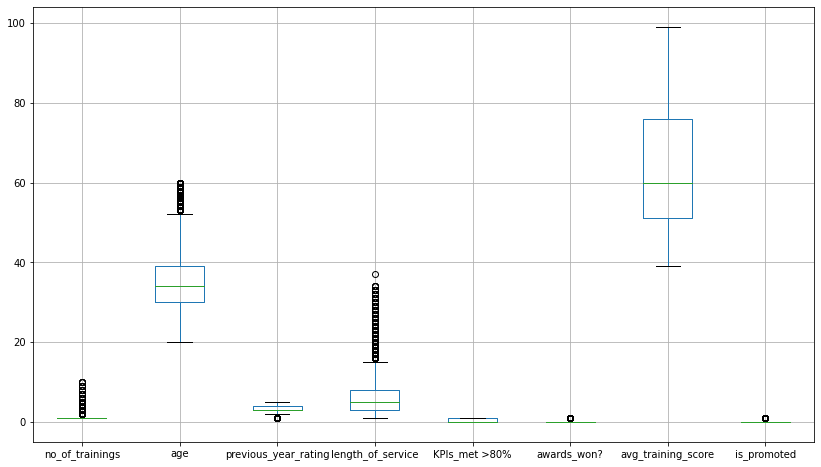

In [12]:
# checking for outliers
plt.figure(figsize = (14, 8))
hr.boxplot()
plt.show()

We see that several variables have outliers, especially 'no_of_trainings', 'age', and 'length_of_service'. This would be problematic when using some classification techniques such as logistic regression which assume that there are no outliers in the data. However, we will not remove these outliers.

## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

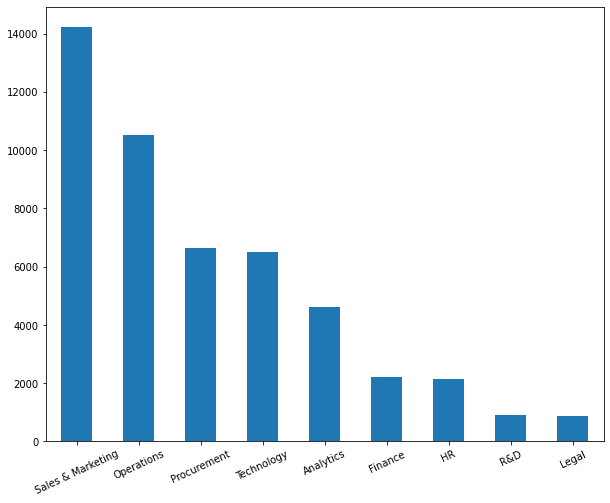

In [13]:
# distribution of department
plt.figure(figsize = (10, 8))
hr.department.value_counts().plot(kind = 'bar', rot = 25)
plt.show()

We see that majority of the employees are in Sales and Marketing.

In [14]:
# getting the top 5 regions
hr.region.value_counts()[:5]

2     10797
22     5427
7      4395
15     2504
13     2459
Name: region, dtype: int64

Region 2 is the leading region.

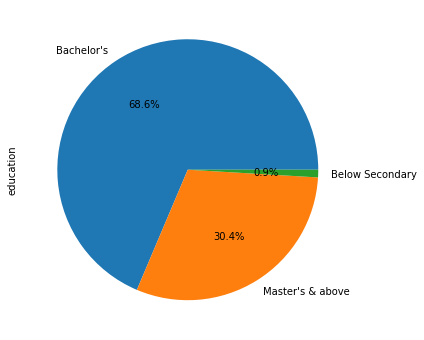

In [15]:
# pie chart of education
plt.figure(figsize = (6, 6))
hr.education.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

Majority of the employees have a Bachelor's degree while very few have below secondary level of education.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


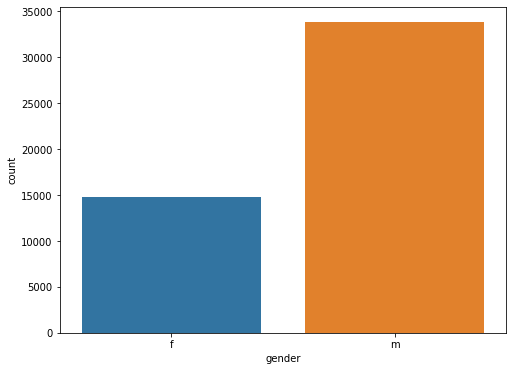

In [16]:
# distribution by gender
plt.figure(figsize = (8, 6))
sns.countplot('gender', data = hr)
plt.show()

There are about twice as many male employees as female employees.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


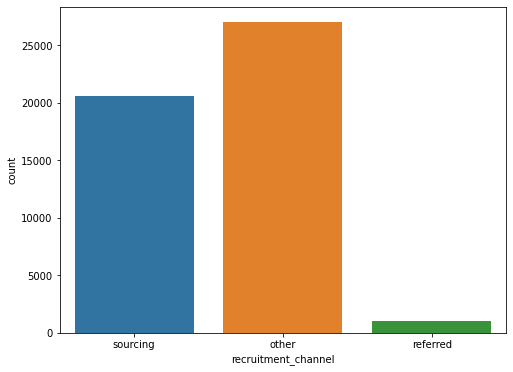

In [17]:
# distribution of recruitment channel
plt.figure(figsize = (8, 6))
sns.countplot('recruitment_channel', data = hr)
plt.show()

Majority of the employees got recruited through other channels while very few were referred.

In [18]:
hr.no_of_trainings.value_counts()

1     39350
2      7105
3      1578
4       402
5       116
6        34
7        10
10        5
8         4
9         3
Name: no_of_trainings, dtype: int64

Most employees have had just 1 training. Very few have more than 6 trainings.

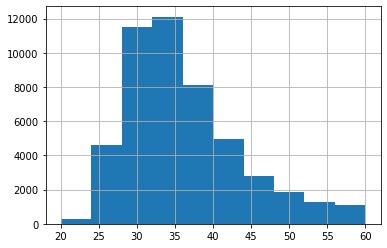

In [19]:
# histogram of age
hr.age.hist()
plt.show()

Majority of the employees are between 27-40 years of age. The distribution is skewed slightly to the right and not completely normal/Gaussian. 

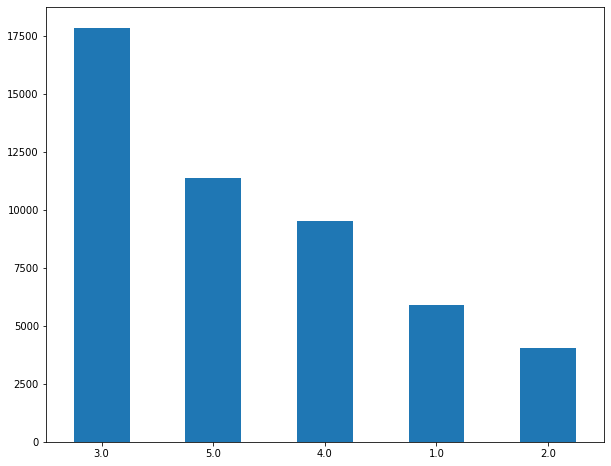

In [20]:
# distribution of previous year's rating
plt.figure(figsize = (10, 8))
hr.previous_year_rating.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of employees rated 3 for the previous year, followed by those who rated 5.  

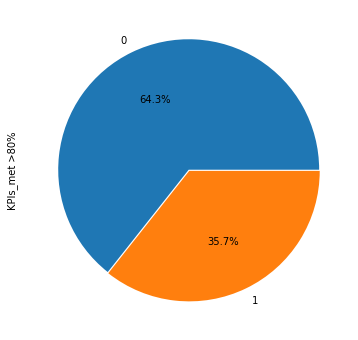

In [21]:
# distribution of KPI
plt.figure(figsize = (6, 6))
hr['KPIs_met >80%'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', explode = (0, 0.01))
plt.show()

Majority of the employees did not meet more than 80% KPIs.

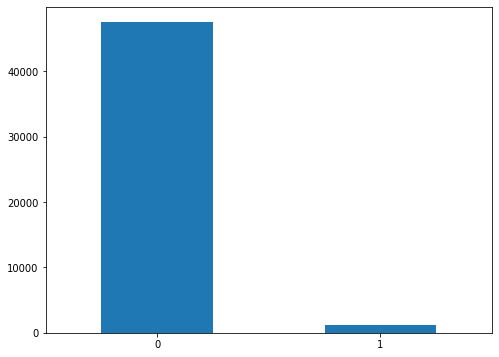

In [22]:
# distribution of awards won
plt.figure(figsize = (8, 6))
hr['awards_won?'].value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the employees did not win any awards.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


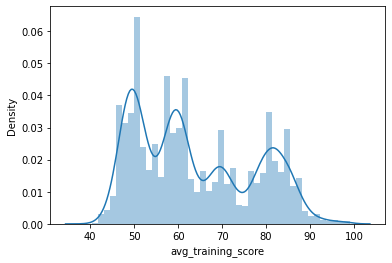

In [23]:
# distribution of average training score
sns.distplot(hr.avg_training_score)
plt.show()

The 'avg_training_score' variable is not normally distributed.

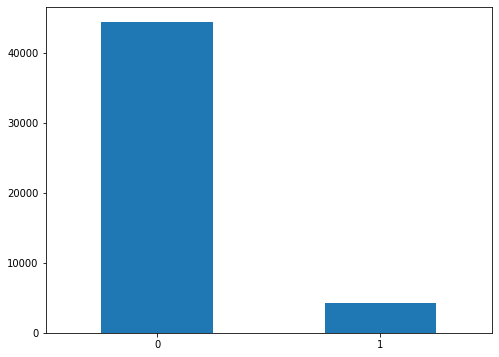

In [24]:
# distribution of promotion status
plt.figure(figsize = (8, 6))
hr.is_promoted.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the employees are not promoted.

### 3.2 Bivariate Analysis

We will look at the relationship between our target variable 'is_promoted' and the other variables.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


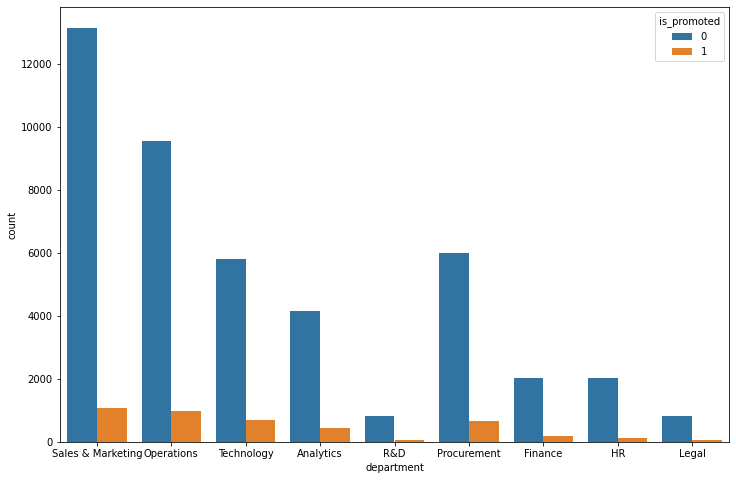

In [25]:
# promotion by department
plt.figure(figsize = (12, 8))
sns.countplot('department', hue = 'is_promoted', data = hr)
plt.show()

It appears that majority of the emloyees that got promoted are from the Sales & Marketing department, the Operations departent, the Technology department and the Procurement department.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


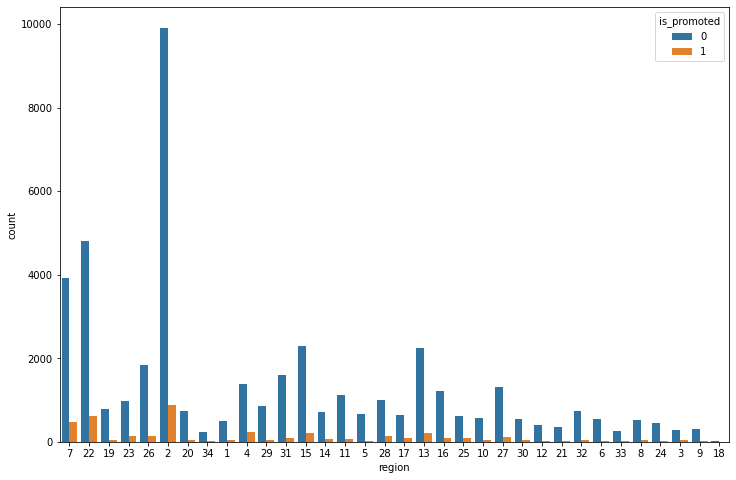

In [26]:
# region by department
plt.figure(figsize = (12, 8))
sns.countplot('region', hue = 'is_promoted', data = hr)
plt.show()

Regions 2, 22, and 7 show high numbers of promoted employees.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


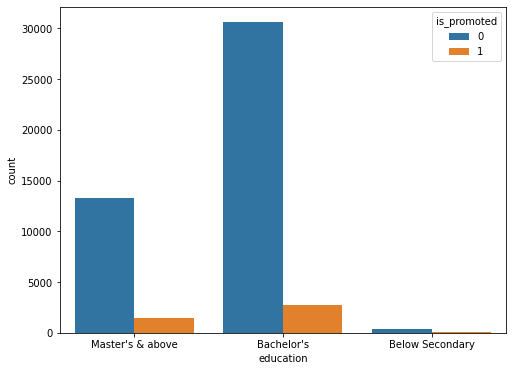

In [27]:
# promotion by education
plt.figure(figsize = (8, 6))
sns.countplot('education', hue = 'is_promoted', data = hr)
plt.show()

Those with Bachelor-level education were promoted more than those with Master's and above or those with below secondary level education.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


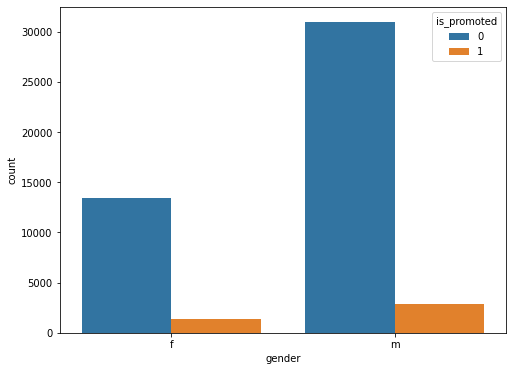

In [28]:
# promotion by gender
plt.figure(figsize = (8, 6))
sns.countplot('gender', hue = 'is_promoted', data = hr)
plt.show()

More males than females were promoted.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


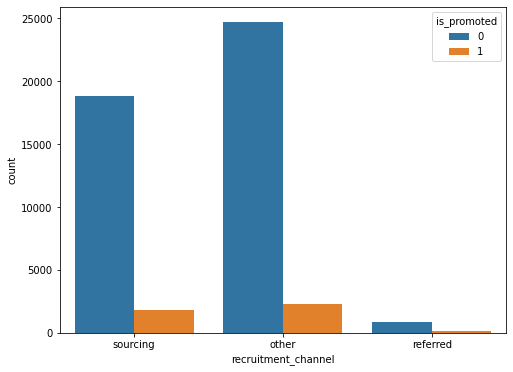

In [29]:
# promotion by recruitment channel
plt.figure(figsize = (8, 6))
sns.countplot('recruitment_channel', hue = 'is_promoted', data = hr)
plt.show()

Those who were recruited via other means were promoted the most, closely followed by those who got recruited through sourcing.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


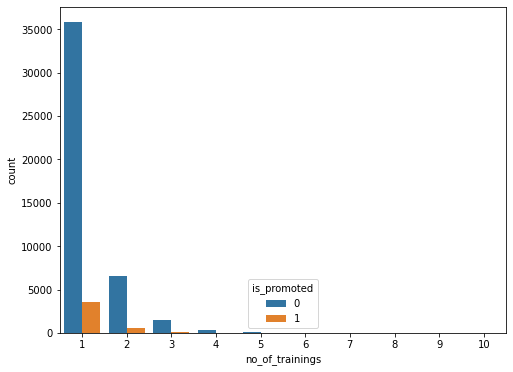

In [30]:
# promotion by number of trainings
plt.figure(figsize = (8, 6))
sns.countplot('no_of_trainings', hue = 'is_promoted', data = hr)
plt.show()

Those who have 1 training make up the majority of those who got promoted.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


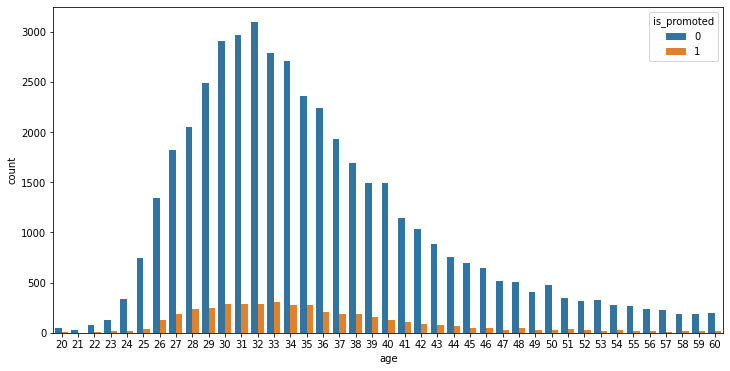

In [31]:
# promotion by age
plt.figure(figsize = (12, 6))
sns.countplot('age', hue = 'is_promoted', data = hr)
plt.show()

Chances of being promoted are high if you're between 26-44 years of age.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


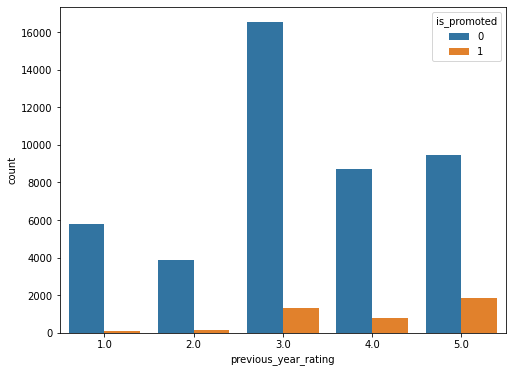

In [32]:
# promotion by previous year's rating
plt.figure(figsize = (8, 6))
sns.countplot('previous_year_rating', hue = 'is_promoted', data = hr)
plt.show()

An interesting thing to note is that those who gave 5 as rating for the previous year were promoted more than those who gave a rating of 3 even though the latter outnumber the former.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


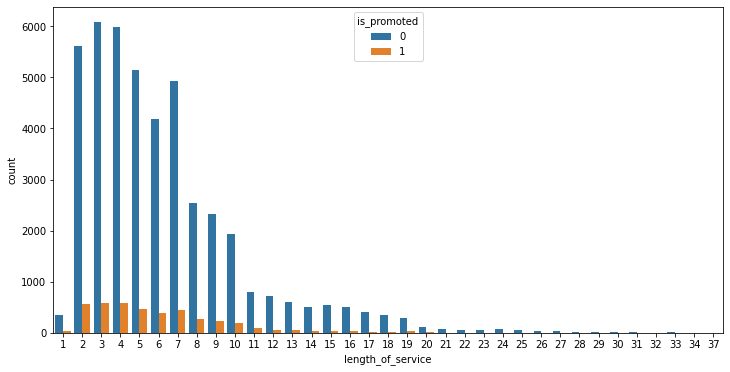

In [33]:
# promotion by length of service
plt.figure(figsize = (12, 6))
sns.countplot('length_of_service', hue = 'is_promoted', data = hr)
plt.show()

Chances of being promoted are high between 2-7 years of service, before gradually dropping through the years.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


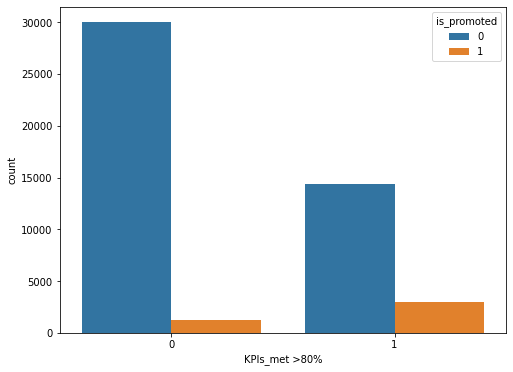

In [34]:
# promotion by KPIs met
plt.figure(figsize = (8, 6))
sns.countplot('KPIs_met >80%', hue = 'is_promoted', data = hr)
plt.show()

Meeting over 80% of KPIs increased chances of being promoted.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


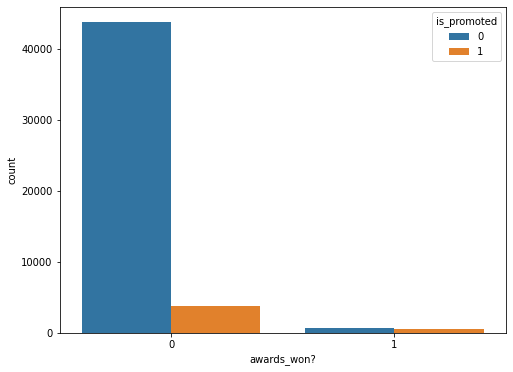

In [35]:
# promotion by awards won
plt.figure(figsize = (8, 6))
sns.countplot('awards_won?', hue = 'is_promoted', data = hr)
plt.show()

Those who did not win any awards were promoted more than those who did. However, because the number of employees who did not win any awards vastly outnumber those who did, it is difficult to ascertain that winning an award influences whether or not you get promoted.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


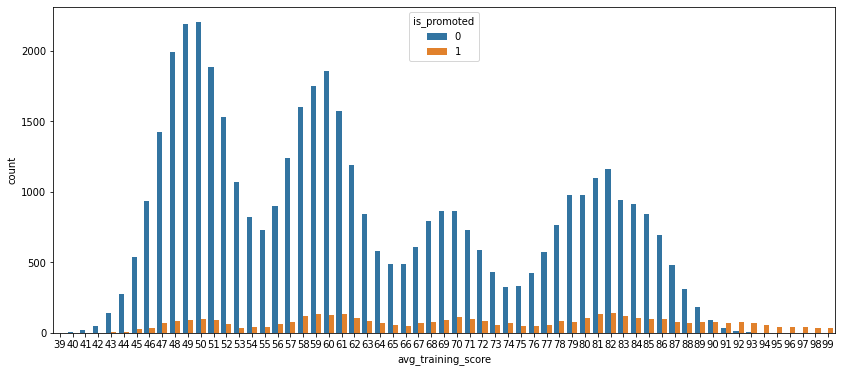

In [36]:
# promotion by average training score
plt.figure(figsize = (14, 6))
sns.countplot('avg_training_score', hue = 'is_promoted', data = hr)
plt.show()

The average training score of those who got promoted fluctuates depending on the number of people with that score. However, having an average score of over 90 increases chcances of being promoted.

#### 3.2.1 Feature Engineering

To explore the correlations between variables, let us first convert the categorical variables into numerical data. We already stripped 'region' of its non-numeric characters so all that's left to do with it is to cast it as an integer.

In [37]:
hr['region'] = hr['region'].astype('int64')
hr.region.dtype

dtype('int64')

Next, the following variables need to be encoded (converted from categorical to numerical form):
- department
- education
- gender
- recruitment channel

To quickly encode them, we will use LabelEncoder.

In [38]:
# importing Label Encoder from the Sklear preprocessing library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fitting the LabelEncoder to the unique values of the 'department' variable
le_department = le.fit(hr['department'].unique())

# getting the classes of the unique values
department_classes = le_department.classes_

# transforming the variable values
hr['department'] = le_department.transform(hr['department'].values)

# previewing our dataset to see our transformed values
hr.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,4,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,7,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,8,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [39]:
# to get the decoded values
print(department_classes[7])
print(department_classes[4])

Sales & Marketing
Operations


In [40]:
# doing the same thing for 'education'
le_education = le.fit(hr['education'].unique())
education_classes = le_education.classes_
hr['education'] = le_education.transform(hr['education'].values)

# preview the decoded values
print(education_classes[2])
print(education_classes[0])

Master's & above
Bachelor's


In [41]:
# doing the same thing for 'gender'
le_gender = le.fit(hr['gender'].unique())
gender_classes = le_gender.classes_
hr['gender'] = le_gender.transform(hr['gender'].values)

# preview the decoded values
print(gender_classes[0])
print(gender_classes[1])

f
m


In [42]:
# doing the same thing for 'recruitment_channel'
le_recruitment = le.fit(hr['recruitment_channel'].unique())
recruitment_classes = le_recruitment.classes_
hr['recruitment_channel'] = le_recruitment.transform(hr['recruitment_channel'].values)

# preview the decoded values
print(recruitment_classes[0])
print(recruitment_classes[2])

other
sourcing


In [43]:
# previewing our transformed dataset
hr.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,7,2,0,2,1,35,5.0,8,1,0,49,0
1,4,22,0,1,0,1,30,5.0,4,0,0,60,0
2,7,19,0,1,2,1,34,3.0,7,0,0,50,0
3,7,23,0,1,0,2,39,1.0,10,0,0,50,0
4,8,26,0,1,0,1,45,3.0,2,0,0,73,0


In [44]:
# confirming all our datatypes are numerical
hr.dtypes

department                int64
region                    int64
education                 int64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

#### 3.2.2 Testing for Multicollinearity

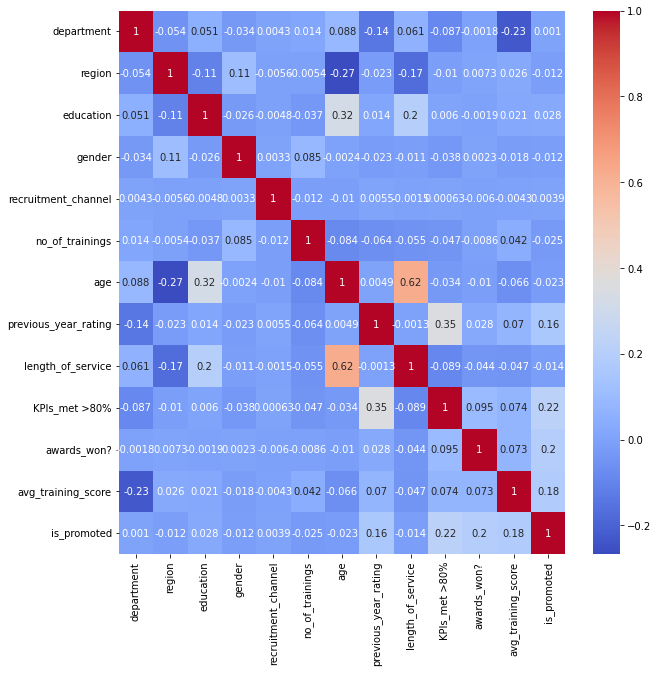

In [45]:
# creating a correlation matrix to visualize correlations
corr = hr.corr()

# visualizing using a heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

We see that age is highly correlated with length of service.

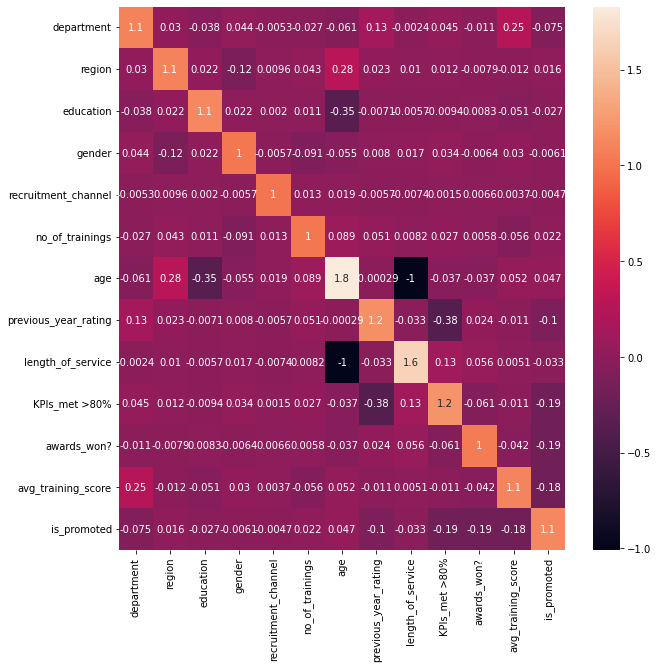

In [46]:
# heatmap of VIF
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

plt.figure(figsize = (10, 10))
sns.heatmap(vif, annot = True)
plt.show()

According to our VIF heatmap, we don't have any values approaching or exceeding 5, which would be indicative of high multicollinearity.

### Data Modeling

We come to the following conclusions about our data:
- it does not have high multicollinearity
- it has many outliers
- it does not have a normal/Gaussian distribution

Thus, knowing this, we know that logistic regression would be a terrible algorithm for our model. We will still use it for comparison purposes.

In [51]:
# dividing our dataset into features (X) and target (y)
X = np.array(hr.drop(columns = ['is_promoted']))
y = hr['is_promoted']

print(X.shape)
print(y.shape)

(48607, 12)
(48607,)


In [52]:
# splitting into 80-20 train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
# performing feature scaling on our training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fitting and transforming X_train while transforming X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# loading our classification libraries
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier

# instantiating our classifiers
logistic_classifier = LogisticRegression()
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_classifier = GaussianNB()

# fitting our classifiers to the training data
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)

# making predictions
logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_y_prediction = svm_classifier.predict(X_test) 
knn_y_prediction = knn_classifier.predict(X_test) 
naive_y_prediction = naive_classifier.predict(X_test)


In [55]:
# printing the classification report for each classifier to assess performance
from sklearn.metrics import classification_report

# classification report for Logistic Regression
print("Logistic Regression classification report:")
print(classification_report(y_test, logistic_y_prediction))

# classification report for Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes classification report:")
print(classification_report(y_test, naive_y_prediction))


# classification report for Decision Tree Classifier
print("Decision Tree classification report:")
print(classification_report(y_test, decision_y_prediction))

# classification report for K-Nearest Neighbors Classifier
print("K-Nearest Neighbors classification report:")
print(classification_report(y_test, knn_y_prediction))

# classification report for Support Vector Machine Classifier
print("Support Vector Machine classification report:")
print(classification_report(y_test, svm_y_prediction))

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8865
           1       0.64      0.07      0.12       857

    accuracy                           0.91      9722
   macro avg       0.78      0.53      0.54      9722
weighted avg       0.89      0.91      0.88      9722

Gaussian Naive Bayes classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8865
           1       0.51      0.14      0.22       857

    accuracy                           0.91      9722
   macro avg       0.71      0.56      0.58      9722
weighted avg       0.89      0.91      0.89      9722

Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8865
           1       0.40      0.44      0.42       857

    accuracy                           0.89      9722
   m

In [ ]:
# We import Artificial Neural Network libraries
# ---
import keras
from keras.models import Sequential     # Used to initialize the Artificial Neural Network
from keras.layers import Dense          # Used to build the hidden Layers
from keras.layers import Dropout        # Used to prevent overfitting


# Defining our ANN
classifier = Sequential()

classifier.add(Dense(units = 100, input_dim = 12, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))

classifier.add(Dense(units = 100, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))

classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model
classifier.fit(X_train, y_train, epochs = 300, batch_size = 32)

# Evaluating our model
loss, accuracy = classifier.evaluate(X_test, y_test)
print('ANN Accuracy:', accuracy)

Epoch 1/300
1216/1216 [==============================] - 4s 2ms/step - loss: 0.2534 - accuracy: 0.9137
Epoch 2/300
1216/1216 [==============================] - 3s 2ms/step - loss: 0.2338 - accuracy: 0.9196
Epoch 3/300
1216/1216 [==============================] - 3s 2ms/step - loss: 0.2296 - accuracy: 0.9215
Epoch 4/300
1216/1216 [==============================] - 3s 2ms/step - loss: 0.2243 - accuracy: 0.9230
Epoch 5/300
1216/1216 [==============================] - 3s 2ms/step - loss: 0.2208 - accuracy: 0.9228
Epoch 6/300
1216/1216 [==============================] - 3s 2ms/step - loss: 0.2153 - accuracy: 0.9245
Epoch 7/300
1216/1216 [==============================] - 3s 2ms/step - loss: 0.2108 - accuracy: 0.9255
Epoch 8/300
1216/1216 [==============================] - 3s 2ms/step - loss: 0.2051 - accuracy: 0.9264
Epoch 9/300
1216/1216 [==============================] - 2s 2ms/step - loss: 0.2019 - accuracy: 0.9287
Epoch 10/300
1216/1216 [==============================] - 2s 2ms/step - l

## <font color='#2F4F4F'>5. Summary of Findings</font>

YOUR SUMMARY OF FINDINGS GO HERE

## <font color='#2F4F4F'>6. Recommendations</font>


YOUR RECOMMENDATIONS GO HERE

## <font color='#2F4F4F'>7. Challenging your Solution</font>


#### a) Did we have the right question?
YOUR RESPONSE GOES HERE

#### b) Did we have the right data?
YOUR RESPONSE GOES HERE

#### c) What can be done to improve the solution?
YOUR RESPONSE GOES HERE